In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\91912\Downloads\archive\data_ecommerce_customer_churn.csv")

## Features

#### 1.Tenure: Tenure of a customer in the company (numeric)
#### 2.WarehouseToHome: Distance between the warehouse to the customer's home (numeric)
#### 3.NumberOfDeviceRegistered: Total number of devices registered to a particular customer (numeric)
#### 4.PreferedOrderCat: Preferred order category of a customer in the last month (categorical)
#### 5.SatisfactionScore: Satisfactory score of a customer on service (numeric)
#### 6.MaritalStatus: Marital status of a customer (categorical)
#### 7.NumberOfAddress: Total number of addresses added for a particular customer (numeric)
#### 8.Complaint: Whether any complaint has been raised in the last month (binary)
#### 9.DaySinceLastOrder: Days since last order by customer (numeric)
#### 10.CashbackAmount: Average cashback in last month (numeric)
#### 11.Churn: Churn flag (target variable, binary)

In [5]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


### Data Exploration

In [7]:
df.shape

(3941, 11)

In [9]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [11]:
df.dtypes

Tenure                      float64
WarehouseToHome             float64
NumberOfDeviceRegistered      int64
PreferedOrderCat             object
SatisfactionScore             int64
MaritalStatus                object
NumberOfAddress               int64
Complain                      int64
DaySinceLastOrder           float64
CashbackAmount              float64
Churn                         int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


### Data Cleaning

#### Mapping "Churn" and "Complain" columns with (Yes or No) for better Understanding.

In [17]:
df["Churn"] = df["Churn"].map({0:"No",1:"Yes"})

In [19]:
df["Churn"].dtype

dtype('O')

In [21]:
df["Complain"] = df["Complain"].map({0:"No",1:"Yes"})

In [23]:
df["Complain"].dtype

dtype('O')

In [25]:
df["NumberOfDeviceRegistered"] = df["NumberOfDeviceRegistered"].map({1:"One",
                                                                     2:"Two",
                                                                     3:"Three",
                                                                     4:"Four",
                                                                     5:"Five",
                                                                     6:"Six"})

In [27]:
df["NumberOfDeviceRegistered"].dtype

dtype('O')

### Handling Missing Values

In [29]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

#### Filling missing values with "median" of the respective column

In [31]:
df["Tenure"].mean()

10.081398452095009

In [33]:
df["Tenure"].median()

9.0

In [35]:
df["Tenure"] = df["Tenure"].fillna(df["Tenure"].median())

In [37]:
df["WarehouseToHome"].median()

14.0

In [39]:
df["WarehouseToHome"] = df["WarehouseToHome"].fillna(df["WarehouseToHome"].median())

In [41]:
df["DaySinceLastOrder"].median()

3.0

In [43]:
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].fillna(df["DaySinceLastOrder"].median())

In [45]:
df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

### Statistical OverView of the Data

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3941.0,10.028165,8.290290,0.0,3.0,9.00,15.00,61.00
WarehouseToHome,3941.0,15.579802,8.275800,5.0,9.0,14.00,20.00,127.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
DaySinceLastOrder,3941.0,4.448871,3.583909,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99


## Visualizations and Insights

### 1.Distribution of Tenure along with Churn

Text(0, 0.5, 'Count')

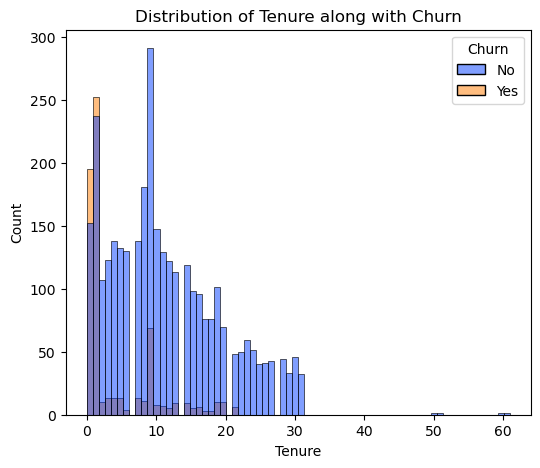

In [86]:
plt.figure(figsize = (6,5))
sns.histplot(data = df,x = "Tenure",bins = 70,hue = "Churn",palette = "bright")
plt.title("Distribution of Tenure along with Churn")
plt.xlabel("Tenure")
plt.ylabel("Count")

**Insights** : 

1.**Churn Behavior by Tenure**:
-A significant proportion of churn (orange) occurs in the initial months of tenure (0–5 range), indicating that customers are more likely to leave early in their relationship with the service.
- As tenure increases beyond this early stage, churn occurrences diminish significantly.

2.**Non-Churners**(Blue):
- The majority of customers who  have tenures ranging from 0–20, with a peak around 5–10 units of tenure.
- Very few non-churning customers have extremely long tenures (beyond 30).

**Recommdentions**:
- Retention efforts should target new customers in their initial months, as they are most vulnerable to churn.
- Understanding factors contributing to customer dissatisfaction early on could help improve retention.

### 2.Distribution of Distance between WareHouse to Customer Home along with Churn

Text(0, 0.5, 'Count')

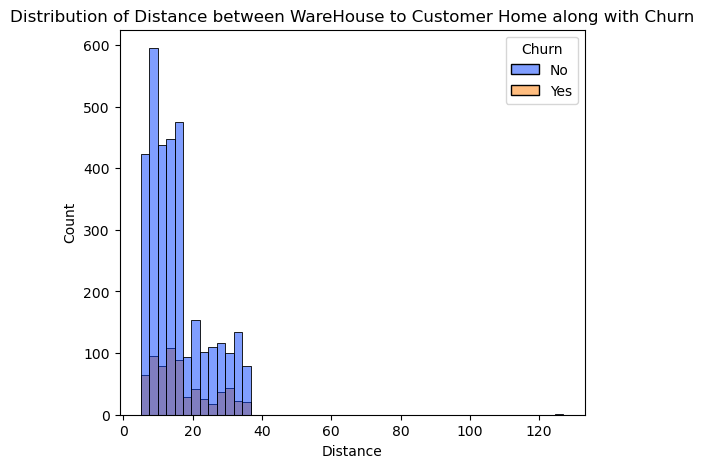

In [92]:
plt.figure(figsize = (6,5))
sns.histplot(data = df,x = "WarehouseToHome",bins = 50,hue = "Churn",palette = "bright")
plt.title("Distribution of Distance between WareHouse to Customer Home along with Churn")
plt.xlabel("Distance")
plt.ylabel("Count")

**Insight**:

1.**Distance Impact on Churn**:
- Most customers live within 0–40 units of distance from the warehouse.
- Customers who churn (orange bars) are present across the same range but seem to have lower counts compared to non-churners (blue bars) for similar distances.

2.**Churn Count Distribution**:
- Churn events (orange) appear more prevalent in shorter distance ranges (e.g., 0–20 units), but the majority still do not churn.
- The proportion of churn events seems lower in higher distance ranges.
  
3.**Outliers**:
- Distances beyond 40 units are rare, with very few customers at distances above 100 units. Churn activity in these ranges is minimal.

4.**Recommdentions**:
- Distance alone may not be a strong driver of churn, as most churn events occur in shorter distances where most customers reside.
- Other factors, such as service quality or delivery time, might play a role in churn behavior.

### 3.Distribution of Cashback amount along with Churn

Text(0, 0.5, 'Count')

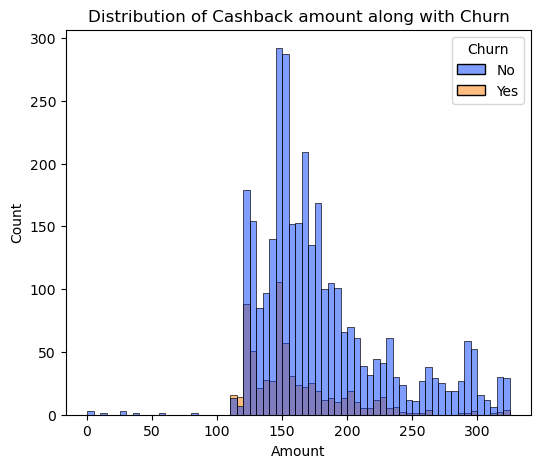

In [94]:
plt.figure(figsize = (6,5))
sns.histplot(data = df,x = "CashbackAmount",bins = 65,hue = "Churn",palette = "bright")
plt.title("Distribution of Cashback amount along with Churn")
plt.xlabel("Amount")
plt.ylabel("Count")

**Insights**

1.**High Concentration of Cashback Amounts Around 150-200**:
- Most customers (both churned and retained) have received cashback amounts in the range of 150 to 200. This indicates that cashback in this range is typical for the e-commerce platform.

2.**Churned Customers Receive Lower Cashback**:
- There is a noticeable pattern where churned customers are more concentrated around lower cashback values, particularly below 150.
- This suggests that low cashback amounts might contribute to customer dissatisfaction, leading to higher churn rates.

3.**Retained Customers Dominate Across All Ranges**:
- Retained customers significantly outnumber churned customers across all cashback ranges, but the gap is particularly wide in the higher cashback ranges (above 200).
- This could indicate that higher cashback rewards may contribute to better retention.

4.**Sparse Data at Extreme Cashback Values**:
- Cashback amounts below 100 and above 250 are less common, with few customers in these ranges, indicating that such amounts are outliers or less frequently offered.

**Recommendations**:
- Consider offering cashback amounts in the 150–200 range or higher to encourage retention, as customers in this bracket seem less likely to churn.
- Identify customers receiving cashback amounts below 150 and consider providing additional benefits or promotions to retain them.

### 4.Percentage distribution of Number of devices registered to a particular customer.

In [96]:
device_count = df["NumberOfDeviceRegistered"].value_counts()
device_count

NumberOfDeviceRegistered
Four     1694
Three    1193
Five      591
Two       192
One       164
Six       107
Name: count, dtype: int64

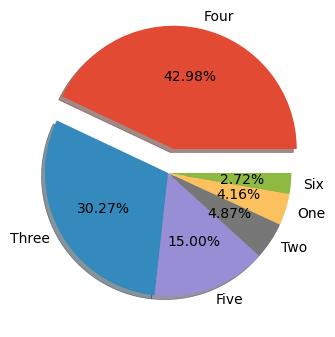

In [102]:
plt.figure(figsize = (4,4))
plt.pie(device_count,labels = device_count.index,autopct = "%1.2f%%",colors =plt.style.use("ggplot"),
       shadow = True,explode=[0.2,0,0,0,0,0]);

**Insights**: Majority of total number of devices registered to a particular customer is **4** which is **42.98%**

### 5.Percentage distribution of Preferred order category of a customer.

In [106]:
Category_count = df["PreferedOrderCat"].value_counts()
Category_count

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

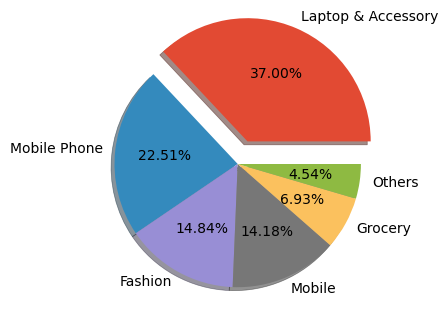

In [108]:
plt.figure(figsize = (4,4))
plt.pie(Category_count,labels = Category_count.index,autopct = "%1.2f%%",colors =plt.style.use("ggplot"),
       shadow = True,explode=[0.2,0,0,0,0,0]);

**Insights**:Mostly preferred order category of a customer is **Laptop & Accessory** which is **37.00%**.

### 6.Percentage distribution of satisfactory score of a customers on service

In [112]:
Score_count = df["SatisfactionScore"].value_counts()
Score_count

SatisfactionScore
3    1190
1     805
5     796
4     758
2     392
Name: count, dtype: int64

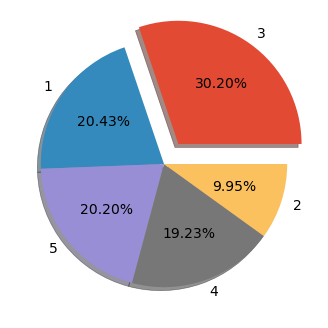

In [114]:
plt.figure(figsize = (4,4))
plt.pie(Score_count,labels = Score_count.index,autopct = "%1.2f%%",colors =plt.style.use("ggplot"),
       shadow = True,explode=[0.2,0,0,0,0]);

**Insights**: Highest satisfactory score of a customers on service is **3** which is **30.2%** 

### 7.Customer Count according to Prefered Order Category along with churn turned

Text(0, 0.5, 'Count')

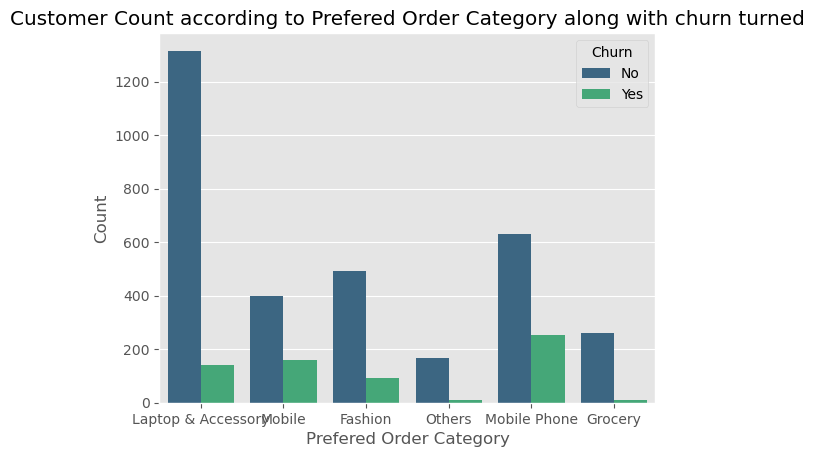

In [186]:
sns.countplot(data = df,x ="PreferedOrderCat",width = 0.8,hue = "Churn",palette = "viridis")
plt.title("Customer Count according to Prefered Order Category along with churn turned")
plt.xlabel("Prefered Order Category")
plt.ylabel("Count")

**Insights** : 

1.**High Customer Count in "Laptop & Accessories"**:
- The majority of customers seem to prefer the "Laptop & Accessories" category. This category has the highest number of customers who have not churned.
- However, the churned customers in this category are relatively low compared to others.

2.**Higher Churn Rate in "Mobile Phone" and "Grocery" Categories**:
- A noticeable proportion of customers who prefer "Mobile Phone" and "Grocery" categories have churned, indicating potential issues in these categories (e.g., product quality, satisfaction, or price competition).

3.**Low Churn in "Fashion"**:
- The "Fashion" category shows a lower churn rate compared to other categories, suggesting that customers in this segment may be more loyal or satisfied.

4.**Small Customer Base in "Others"**:
- The "Others" category has the smallest customer base, with a relatively balanced churn and retention proportion. This may indicate a niche market or less emphasis on these products.

**Recommendations**:
- Investigate issues in the "Mobile Phone" and "Grocery" categories, as these may be contributing significantly to overall churn.
- Analyze what makes the "Fashion" category more successful at retaining customers and consider replicating these strategies for other segments.
- Focus on retaining the large customer base in "Laptop & Accessories" through targeted campaigns, as losing even a small proportion of this group can significantly impact revenue.

### 8.Customer Count according to Satisfaction Score along with Churn turned

Text(0, 0.5, 'Count')

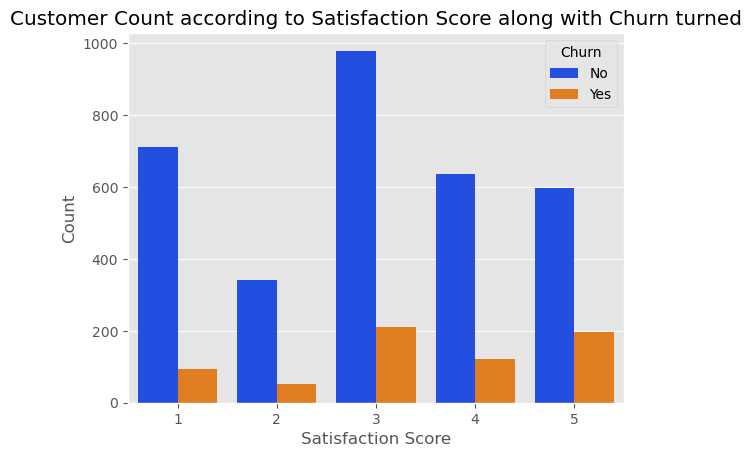

In [188]:
sns.countplot(data = df,x ="SatisfactionScore",hue = "Churn",palette = "bright")
plt.title("Customer Count according to Satisfaction Score along with Churn turned")
plt.xlabel("Satisfaction Score")
plt.ylabel("Count")

**Insights**:

1.**Low Satisfaction Scores** (1 & 2):
- Customers with lower satisfaction scores (1 and 2) have a higher churn rate (orange bars) compared to those with higher scores.
- This indicates dissatisfaction is a significant driver of churn.
  
2.**Medium Satisfaction Score** (3):
- Customers with a satisfaction score of 3 exhibit the highest count of non-churned customers (blue bar is tallest).
- While the churn count is lower for this score, it is still present, suggesting average satisfaction does not fully eliminate churn risk.

3.**High Satisfaction Scores**(4 & 5):
- Customers with high satisfaction scores (4 and 5) are less likely to churn (blue bars are significantly taller than orange).
- High satisfaction correlates strongly with customer retention.

**Trend Overview**:
- As satisfaction scores increase, churn rates decrease, highlighting the importance of maintaining high satisfaction levels to retain customers.

**Recommendations**:
- Focus on dissatisfied customers (scores 1-2): Identify pain points and address them to improve retention.
- Enhance satisfaction strategies: Keep satisfaction scores at 4 or above through personalized services, loyalty programs, or faster issue resolution.
- Target score 3 customers: Engage moderately satisfied customers to ensure they don't churn.

### 9.Customer Count according to complaints raised along with Churn

Text(0, 0.5, 'Count')

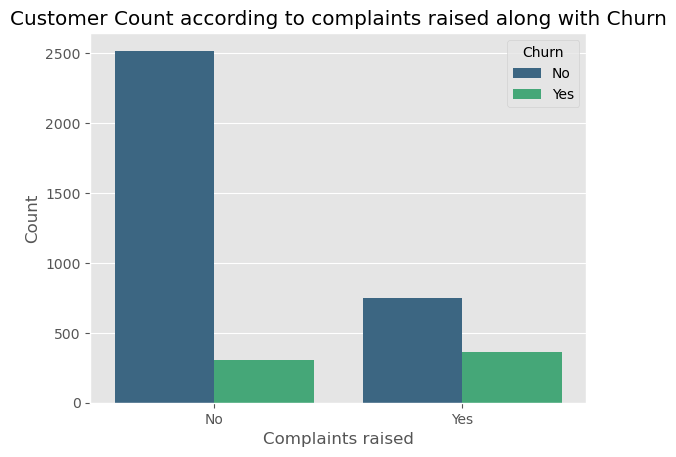

In [190]:
sns.countplot(data = df,x ="Complain",hue = "Churn",palette = "viridis")
plt.title("Customer Count according to complaints raised along with Churn")
plt.xlabel("Complaints raised")
plt.ylabel("Count")

**Insights**:Cutsomers who have raised complaints has turned more **Churn**.

1.**Customers Without Complaints**(No):
- The majority of customers who did not raise complaints tend to not churn (blue bar is significantly higher than green).
- This suggests that customers who do not face issues or do not report complaints are more likely to remain loyal.

2.**Customers With Complaints**(Yes):
- Among customers who raised complaints, a noticeable proportion has churned (green bar for complaints raised is significant).
- This indicates that dissatisfaction (evidenced by complaints) correlates with higher churn rates.

3.**Impact of Complaints on Churn**:
- Raising complaints appears to be a strong indicator of dissatisfaction, increasing the likelihood of churn.
- However, not all customers with complaints churn, suggesting that some complaints may be resolved effectively.

 **Recommendations**:
- Focus on complaint resolution: Address customer complaints promptly to reduce churn.
- Proactive customer service: Identify patterns in complaints to prevent issues before they occur.
- Analyze complaints further: Look into the types of complaints to understand what drives customer dissatisfaction and potential churn.

### 10.Relationship between Tenure,WarehouseToHome,DaySinceLastOrder,CashbackAmount.

<Axes: >

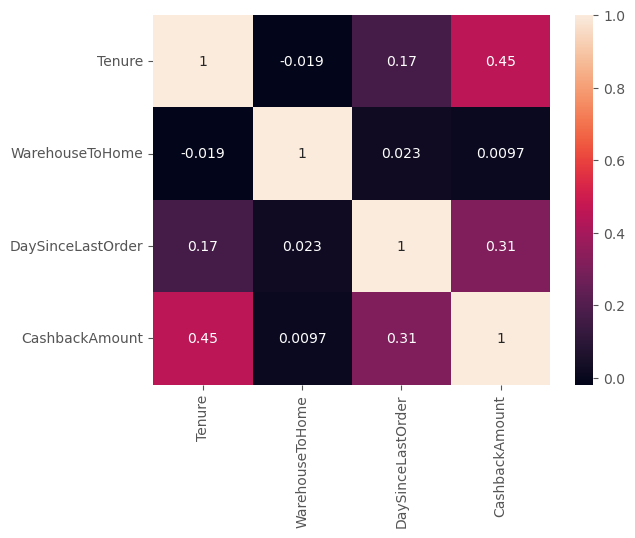

In [217]:
sns.heatmap(df[["Tenure","WarehouseToHome","DaySinceLastOrder","CashbackAmount"]].corr(),annot=True,cbar ="Y1GrBu")

**Insights**:Based on the heatmap, here are some insights regarding the correlations between the variables:

1.**Tenure and CashbackAmount** (0.45)
- There is a moderate positive correlation between Tenure (length of time with the company) and CashbackAmount.
- Customers who have been with the company longer are likely to receive higher cashback amounts, suggesting a possible reward or retention strategy for loyal customers.

2.**DaySinceLastOrder and CashbackAmount** (0.31)
- A weak positive correlation exists between DaySinceLastOrder (how long ago the last order was placed) and CashbackAmount.
- Customers who haven’t ordered in a while might receive cashback offers to re-engage them.

3.**DaySinceLastOrder and Tenure** (0.17)
- A weak positive correlation indicates that customers with a longer tenure tend to have slightly more days since their last order. This might suggest some long-term customers becoming less active over time.
  
4.**WarehouseToHome Correlations**
- WarehouseToHome (distance from warehouse to customer’s home) shows very low or negligible correlations with all other variables.
- This suggests that distance has minimal impact on tenure, cashback amounts, or days since the last order in this dataset.

**Overall Observations**:
- Cashback strategies appear to be associated with customer tenure and recency of activity.
- The heatmap does not show any strong correlation (above 0.6) among the variables, indicating weak linear relationships in this subset of data.
- Variables like WarehouseToHome seem to have minimal influence on the other features.